# AI for Execs - Warsaw - 2025

## Basic ML examples
This notebook provides a step-by-step guide on handling a dataset using **Pandas** for data exploration, **Scikit-learn** for modeling, and **Seaborn/Matplotlib** for visualization. We'll cover:
- Loading and exploring data with Pandas
- Cleaning and preparing the dataset
- Building a machine learning model with Scikit-learn
- Evaluating and visualizing model performance

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#### **3. Load and Explore the Dataset**
We will use the **Iris dataset**, a well-known dataset in machine learning.

In [2]:
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()

# Convert to Pandas DataFrame
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target  # Add target column

# Display first few rows
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### **4. Data Understanding and Cleaning**

In [3]:
# Basic dataset information
data.info()
# Summary statistics
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [4]:
# Check for missing values
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

#### **5. Visualizing Data**
First, we will generate a **pairplot** to visualize feature distributions and their relationships.

Then, we will plot the **correlation matrix** for this data. This helps us understand the relationships between features.



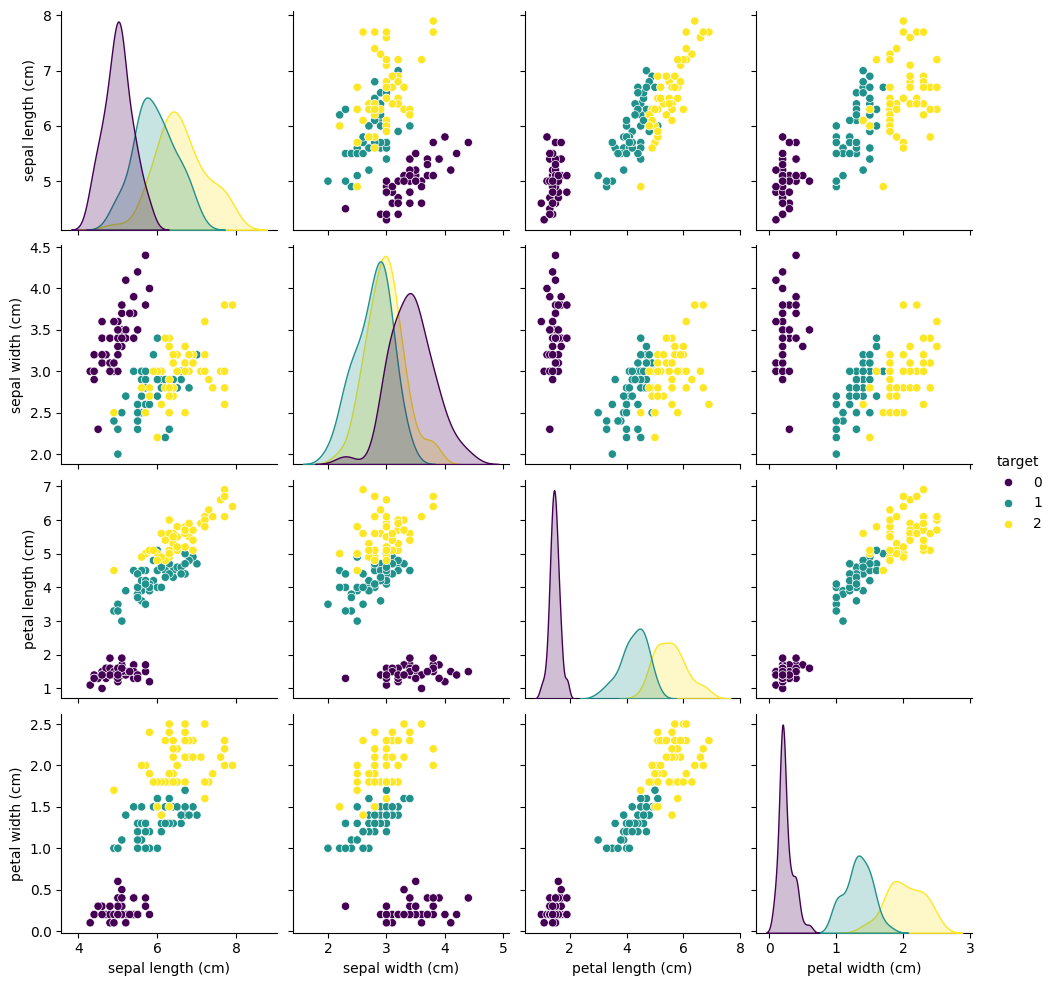

In [5]:
sns.pairplot(data, hue='target', palette='viridis')
plt.show()

# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

#### **6. Splitting Data for Training and Testing**
We split the dataset into **80% training** and **20% testing**:

In [6]:
X = data.drop(columns=['target'])  # Features
y = data['target']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scaling ensures that **features are on the same scale**, which helps with model convergence.

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### **8. Model Training**
We train a **Random Forest Classifier**:

In [8]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

#### **9. Model Evaluation**
1. We will run some predictions with the model and calcualte the accuracy against the ground truth data.
2. Then we will produce a **classification report**. This shows **precision, recall, and F1-score** for each class.
3. A **confusion matrix** shows the numbers across the predicted and actual classes. 

In [9]:
y_pred = model.predict(X_test_scaled)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [10]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



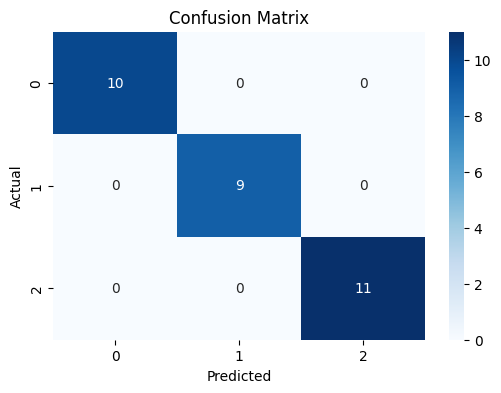

In [11]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### **10. Feature Importance**
This helps us **identify the most important features** in the dataset.


/tmp/ipykernel_18250/1875743838.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette='viridis')


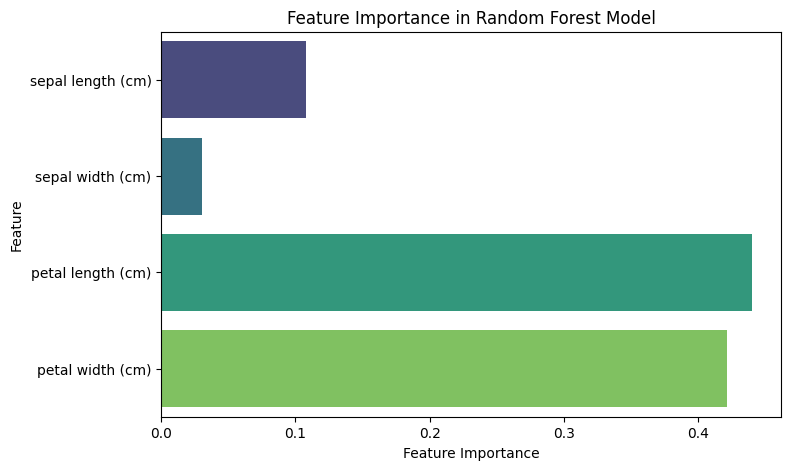

In [12]:
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Model')
plt.show()

#### **11. Clustering Analysis with K-Means**
This clusters the dataset into **three groups**, visualizing how K-Means categorizes the data.

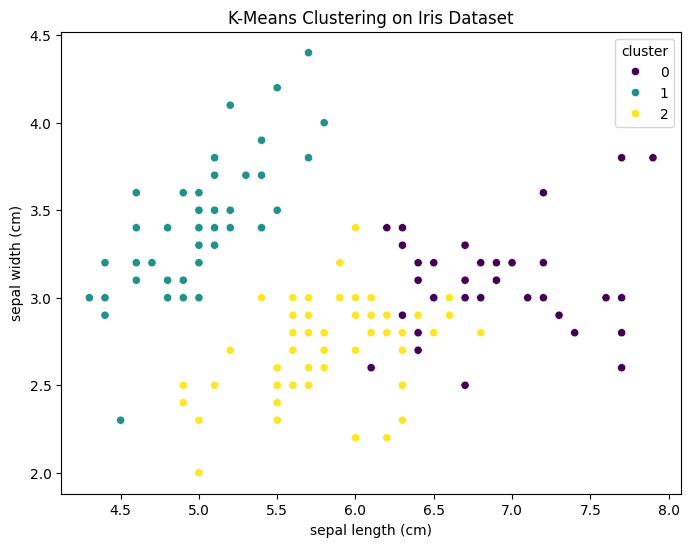

In [13]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
data['cluster'] = kmeans.labels_

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=data['cluster'], palette='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('K-Means Clustering on Iris Dataset')
plt.show()

#### **12. Anomaly Detection with Isolation Forest**
This detects anomalies based on feature distributions and **highlights potential outliers**.

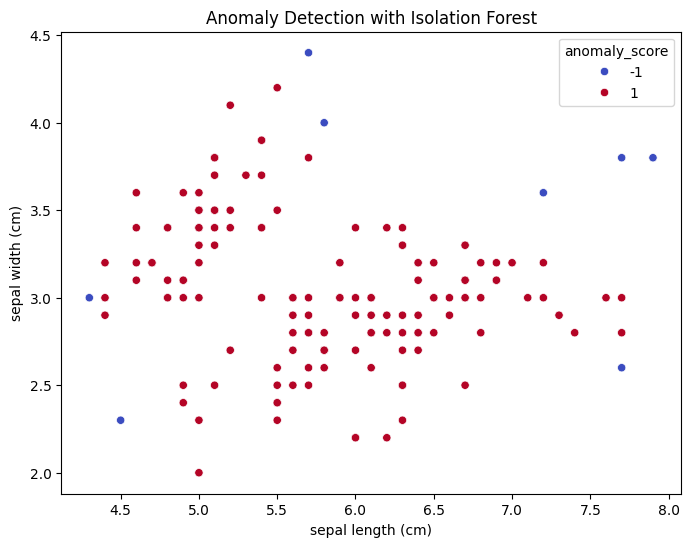

In [14]:
iso_forest = IsolationForest(contamination=0.05, random_state=42)
data['anomaly_score'] = iso_forest.fit_predict(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=data['anomaly_score'], palette='coolwarm')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Anomaly Detection with Isolation Forest')
plt.show()

#### **13. Summary & Takeaways**
- We explored and visualized the dataset.
- We preprocessed the data (scaling and splitting).
- We trained a **Random Forest model** for classification.
- We evaluated performance with accuracy, classification report, and confusion matrix.
- We applied **K-Means clustering** to group similar data points.
- We performed **anomaly detection** to identify potential outliers.

---

### **Next Steps**
- Try different models (**SVM, Logistic Regression, etc.**)
- Optimize hyperparameters with **GridSearchCV**
- Apply clustering to other datasets
- Use anomaly detection for fraud detection

---

🎉 **You’ve completed a full ML workflow, including classification, clustering, and anomaly detection!** 🚀